In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset**

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False


In [ ]:
train = train.drop(["Dept"],axis=1)
train.head(3)

,Store,Date,Weekly_Sales,IsHoliday
0,1,2010-02-05,24924.50,False
1,1,2010-02-12,46039.49,True
2,1,2010-02-19,41595.55,False


In [ ]:
train.tail(3)

,Store,Date,Weekly_Sales,IsHoliday
421567,45,2012-10-12,1061.02,False
421568,45,2012-10-19,760.01,False
421569,45,2012-10-26,1076.80,False


In [ ]:
train.shape

(421570, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 10.1+ MB


In [ ]:
import datetime as dt

train["Date"] = train["Date"].apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d"))

In [ ]:
#test.head(4)

In [ ]:
#test = test.drop(["Store","Dept"],axis=1)
#test.head(3)

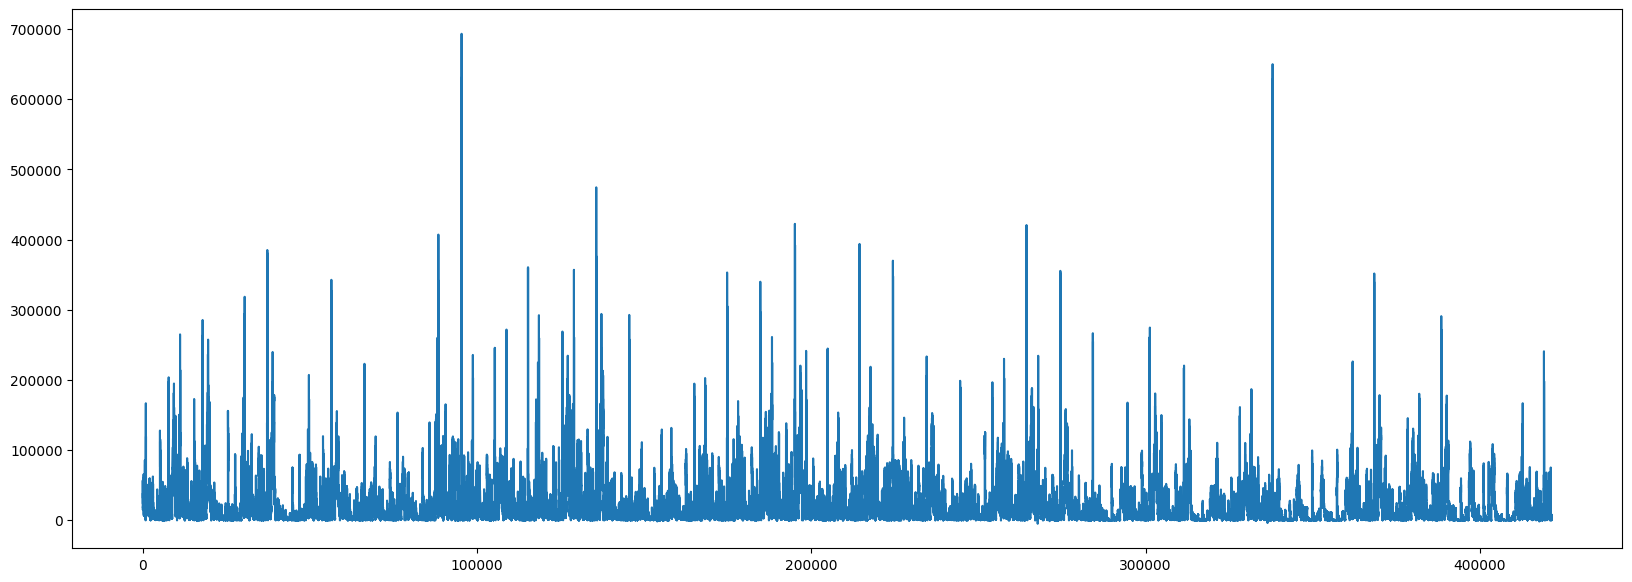

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train.Weekly_Sales)

In [ ]:
train[train.duplicated()]

,Store,Date,Weekly_Sales,IsHoliday
18147,2,2011-09-23,10.00,False
35859,4,2010-04-09,2.96,False
45863,5,2011-05-06,40.00,False
55827,6,2012-04-20,2295.00,False
64990,7,2010-03-19,3.00,False
...,...,...,...,...
404761,43,2011-11-18,50.00,False
408015,44,2011-08-12,55.00,False
408049,44,2012-05-18,20.00,False
408084,44,2012-08-03,5.97,False


In [ ]:
train_grp = train.groupby("Date").sum()

In [ ]:
train_grp

,Store,Weekly_Sales,IsHoliday
Date,,,
2010-02-05,65124,49750740.50,0
2010-02-12,65082,48336677.63,2956
2010-02-19,65610,48276993.78,0
2010-02-26,65045,43968571.13,0
2010-03-05,64897,46871470.30,0
...,...,...,...
2012-09-28,65866,43734899.40,0
2012-10-05,66296,47566639.31,0
2012-10-12,66453,46128514.25,0


In [ ]:
train_grp[train_grp.duplicated()]

,Store,Weekly_Sales,IsHoliday
Date,,,


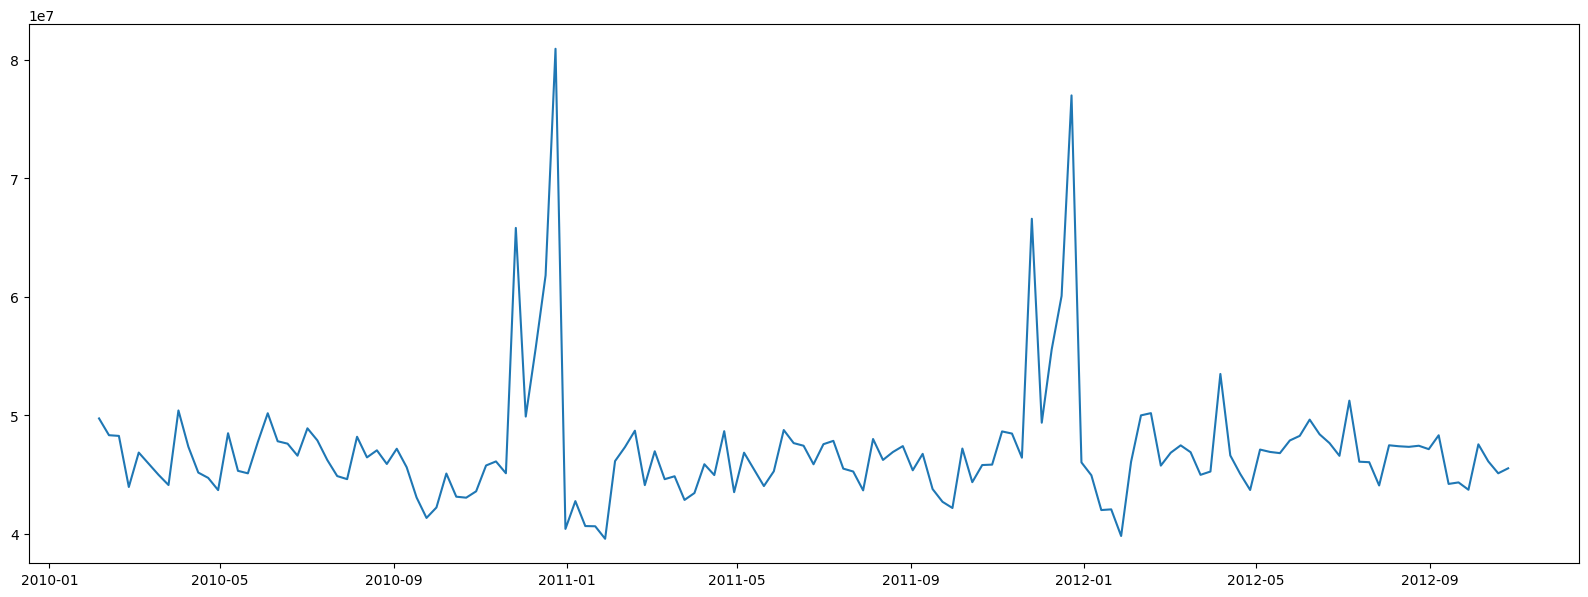

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train_grp.Weekly_Sales)

**Performing Stationarity test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
p_value = adfuller(train_grp.Weekly_Sales)

In [ ]:
p_value

(-5.908297957186334,
 2.675979158986027e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [ ]:
2.675979158986027e-07 < 0.05

True

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

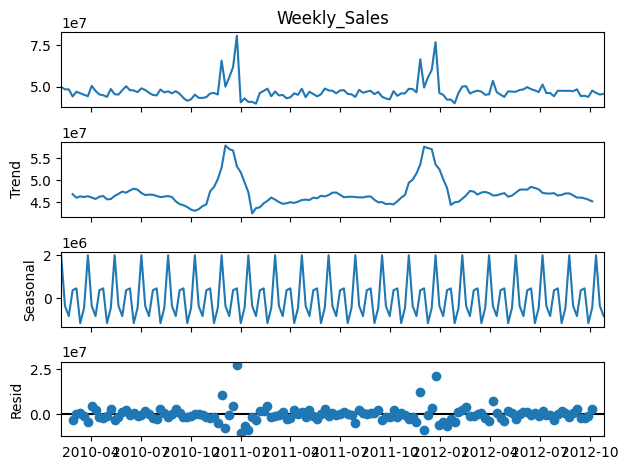

In [ ]:
seasonal_decompose(train_grp.Weekly_Sales,period=7).plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

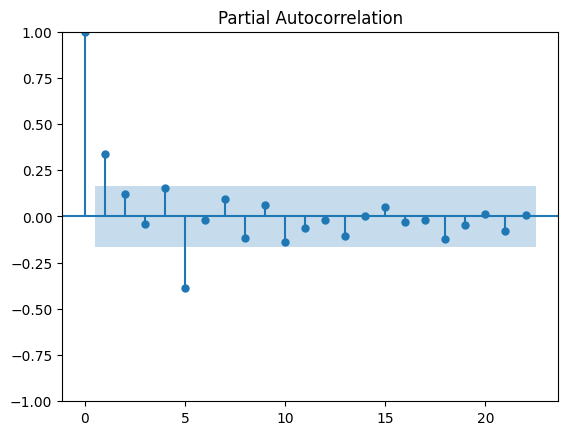

In [ ]:
plot_pacf(train_grp.Weekly_Sales)
plt.show()

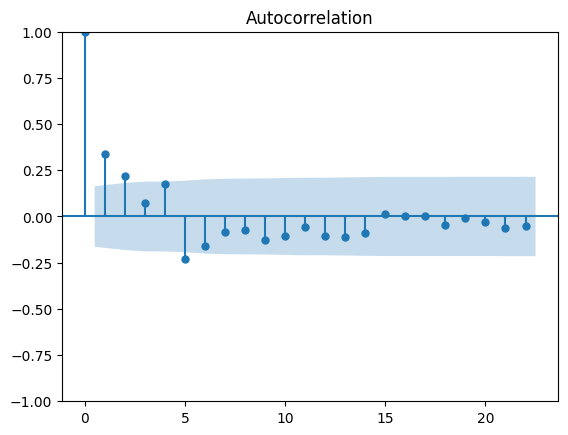

In [ ]:
plot_acf(train_grp.Weekly_Sales)
plt.show()

**ARIMA Model**

In [ ]:
p,q,d= 5,0,1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train_grp.Weekly_Sales,order=(p,d,q))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
train_grp

,Store,Weekly_Sales,IsHoliday
Date,,,
2010-02-05,65124,49750740.50,0
2010-02-12,65082,48336677.63,2956
2010-02-19,65610,48276993.78,0
2010-02-26,65045,43968571.13,0
2010-03-05,64897,46871470.30,0
...,...,...,...
2012-09-28,65866,43734899.40,0
2012-10-05,66296,47566639.31,0
2012-10-12,66453,46128514.25,0


<Axes: xlabel='Date'>

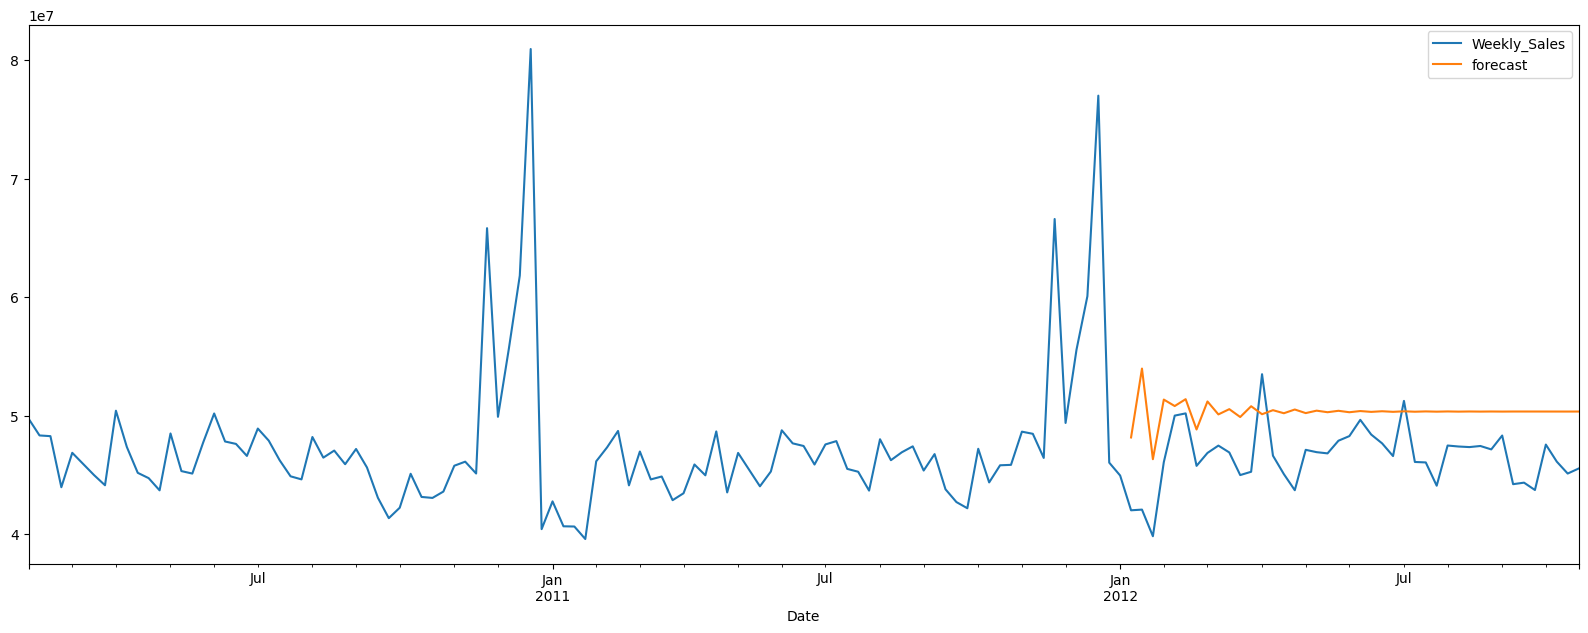

In [ ]:
df = train_grp.drop("IsHoliday",axis=1)
df['forecast']=arima_model.predict(start=101,end=143,dynamic=True)
df[['Weekly_Sales','forecast']].plot(figsize=(20,7))

**SARIMAX Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model1 = SARIMAX(train_grp.Weekly_Sales,order=(p,d,q),seasonal_order=(p,d,q,12))
sarimax_model = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

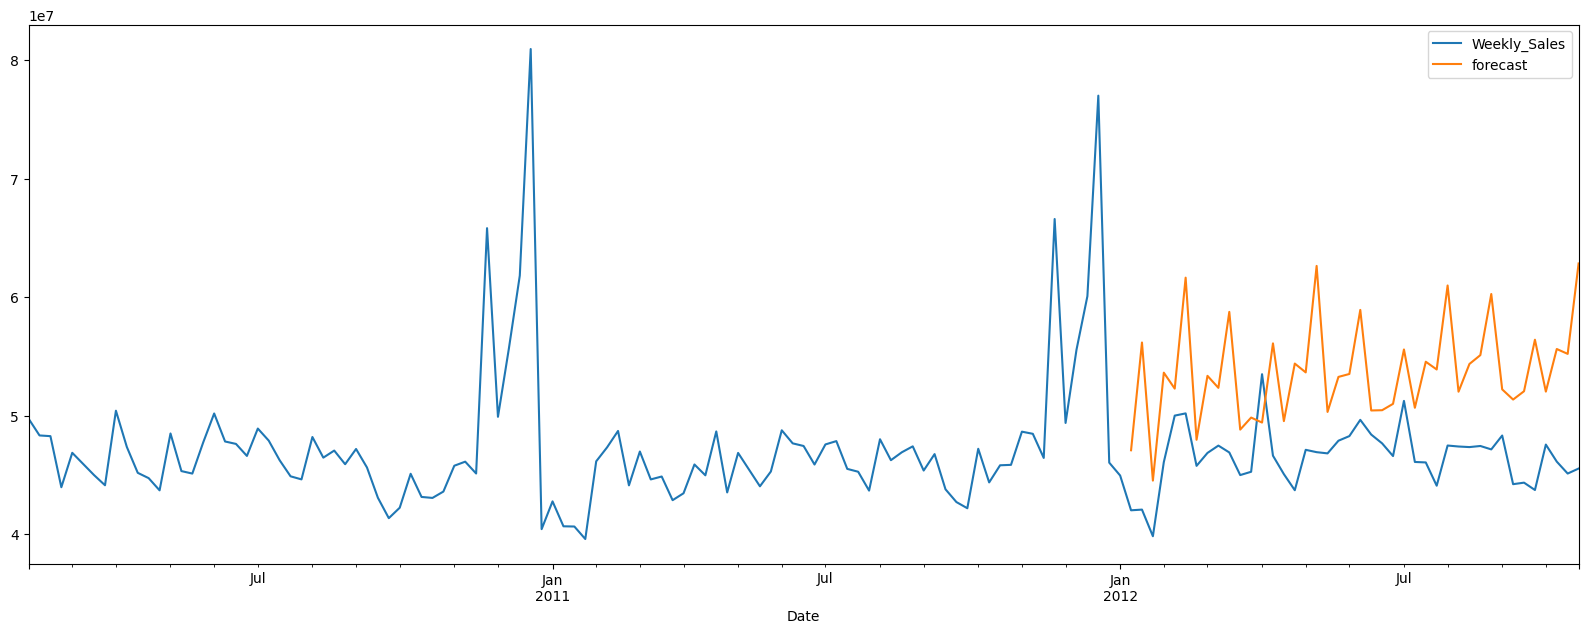

In [ ]:
df2 = train_grp.drop("IsHoliday",axis=1)
df2['forecast']=sarimax_model.predict(start=101,end=143,dynamic=True)
df2[['Weekly_Sales','forecast']].plot(figsize=(20,7))

<Axes: xlabel='Date'>

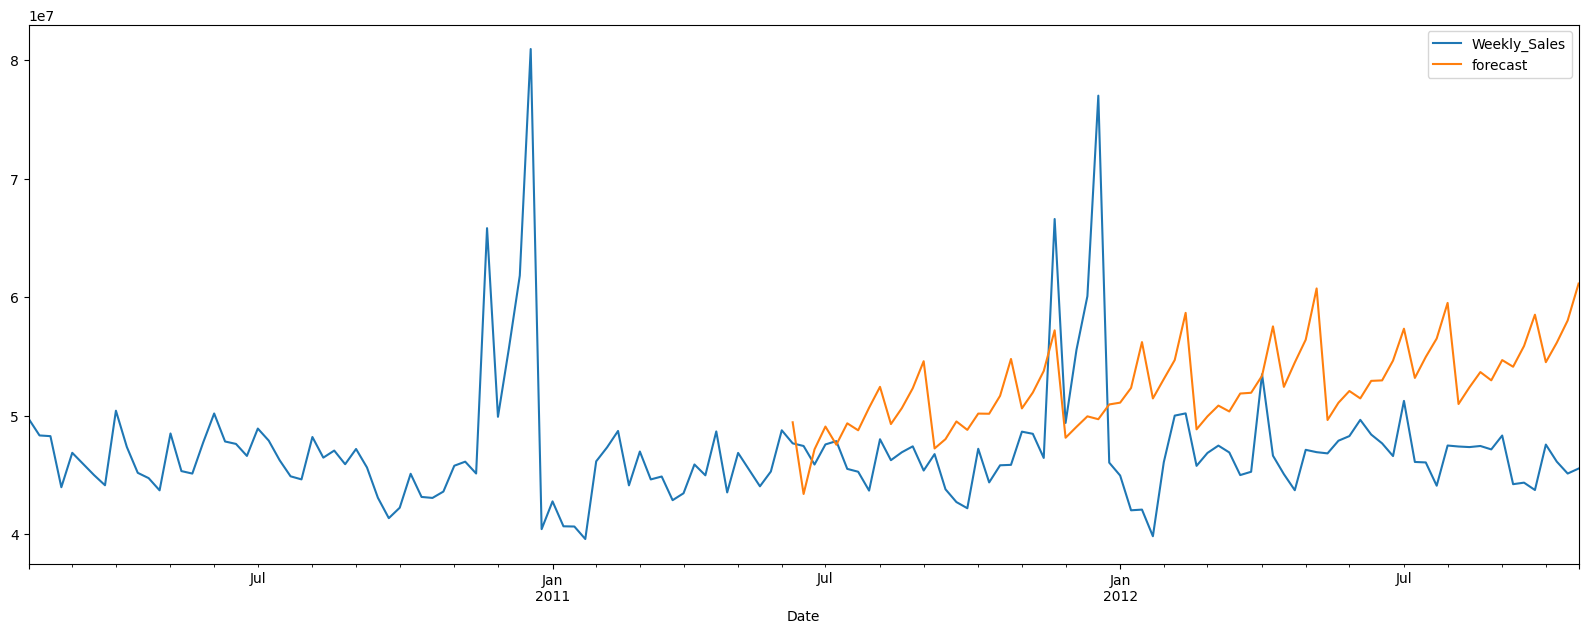

In [ ]:
df3 = train_grp.drop("IsHoliday",axis=1)
df3['forecast']=sarimax_model.predict(start=70,end=143,dynamic=True)
df3[['Weekly_Sales','forecast']].plot(figsize=(20,7))

In [ ]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 12)   Log Likelihood               -2225.539
Date:                            Thu, 18 Jan 2024   AIC                           4473.079
Time:                                    12:45:19   BIC                           4504.622
Sample:                                02-05-2010   HQIC                          4485.896
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2870      0.122     -2.350      0.019      -0.526      -0.048
ar.L2         -0.1485      0.111     -1.342      0.180      -0.365       0.068
ar.L3         -0.1490      0.121     -1.233      0.217      -0.386       0.088
ar.L4          0.1291      0.137      0.941      0.347      -0.140       0.398
ar.L5         -0.2000      0.162     -1.231      0.218      -0.518       0.118
ar.S.L12      -0.6795      0.143     -4.741      0.000      -0.960      -0.399
ar.S.L24      -0.4960      0.194     -2.563      0.010      -0.875      -0.117
ar.S.L36      -0.3589      0.224     -1.605      0.108      -0.797       0.079
ar.S.L48      -0.2220      0.235     -0.945      0.344      -0.682       0.238
ar.S.L60      -0.1040      0.186     -0.560      0.575      -0.468       0.260
sigma2      5.987e+13   2.56e-15   2.34e+28      0.000    5.99e+13    5.99e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):               102.47
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+44. Standard errors may be unstable.
"""

In [ ]:
train_grp.IsHoliday.value_counts()

0       133
2938      2
2956      1
2937      1
2943      1
2958      1
3021      1
3003      1
3001      1
2966      1
Name: IsHoliday, dtype: int64

In [ ]:
train_grp["IsHoliday"] = train_grp["IsHoliday"].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
train_grp.IsHoliday.value_counts()

0    133
1     10
Name: IsHoliday, dtype: int64

**SARIMAX Model with Exogeneous variable**

In [ ]:
model1 = SARIMAX(endog=train_grp.Weekly_Sales, exog=train_grp.IsHoliday, order=(p, d, q), seasonal_order=(p, d, q, 12))
sarimax_model_exog = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 12)   Log Likelihood               -2225.539
Date:                            Thu, 18 Jan 2024   AIC                           4473.079
Time:                                    12:45:25   BIC                           4504.622
Sample:                                02-05-2010   HQIC                          4485.896
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2870      0.122     -2.350      0.019      -0.526      -0.048
ar.L2         -0.1485      0.111     -1.342      0.180      -0.365       0.068
ar.L3         -0.1490      0.121     -1.233      0.217      -0.386       0.088
ar.L4          0.1291      0.137      0.941      0.347      -0.140       0.398
ar.L5         -0.2000      0.162     -1.231      0.218      -0.518       0.118
ar.S.L12      -0.6795      0.143     -4.741      0.000      -0.960      -0.399
ar.S.L24      -0.4960      0.194     -2.563      0.010      -0.875      -0.117
ar.S.L36      -0.3589      0.224     -1.605      0.108      -0.797       0.079
ar.S.L48      -0.2220      0.235     -0.945      0.344      -0.682       0.238
ar.S.L60      -0.1040      0.186     -0.560      0.575      -0.468       0.260
sigma2      5.987e+13   2.56e-15   2.34e+28      0.000    5.99e+13    5.99e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):               102.47
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+44. Standard errors may be unstable.
"""

In [ ]:
test = pd.read_csv("test.csv",usecols=["Date","IsHoliday"])

In [ ]:
test

,Date,IsHoliday
0,2012-11-02,False
1,2012-11-09,False
2,2012-11-16,False
3,2012-11-23,True
4,2012-11-30,False
...,...,...
115059,2013-06-28,False
115060,2013-07-05,False
115061,2013-07-12,False
115062,2013-07-19,False


In [ ]:
import datetime as dt

test["Date"] = test["Date"].apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d"))

In [ ]:
test_grp = test.groupby("Date").sum()

In [ ]:
test_grp.IsHoliday.value_counts()

0       36
2976     1
2988     1
2964     1
Name: IsHoliday, dtype: int64

In [ ]:
test_grp["IsHoliday"] = test_grp["IsHoliday"].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
test_grp.IsHoliday.value_counts()

0    36
1     3
Name: IsHoliday, dtype: int64

In [ ]:
test_grp.shape

(39, 1)

In [ ]:
forecast=sarimax_model_exog.get_forecast(39,dynamic=True,exog=test_grp.IsHoliday)

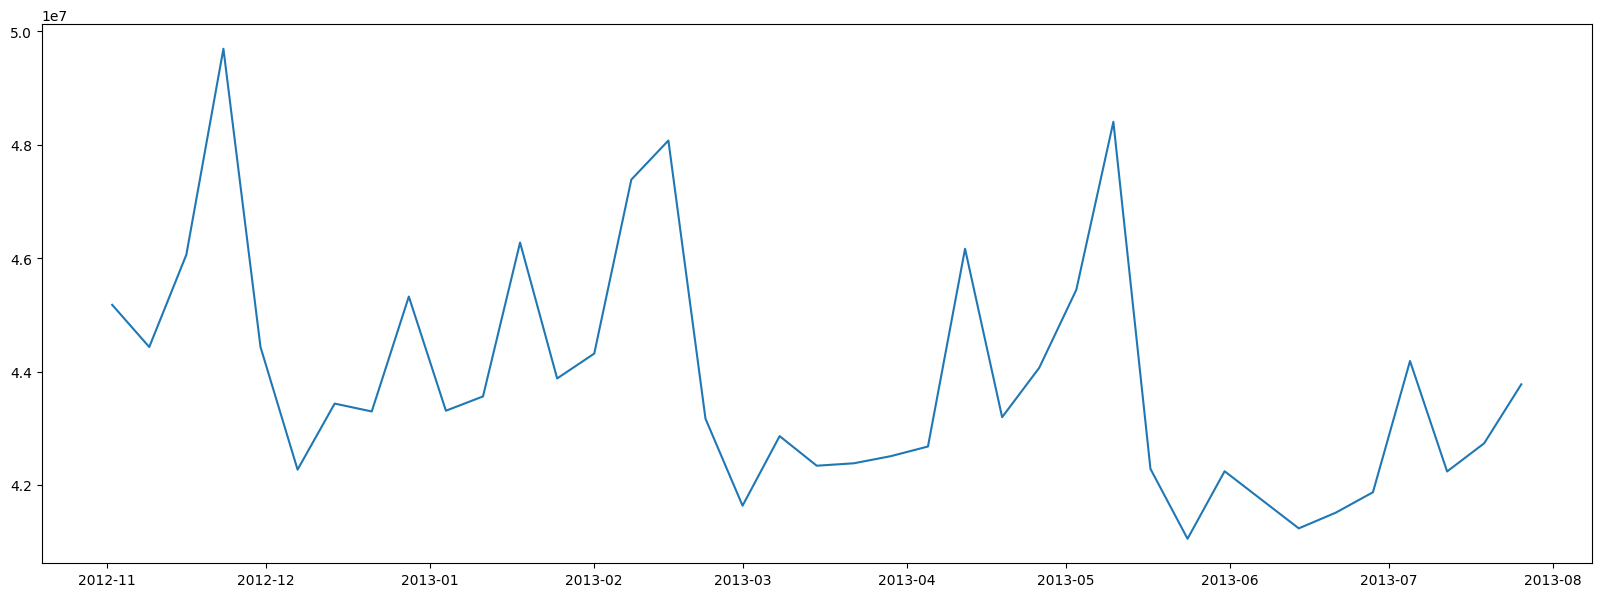

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(forecast.predicted_mean)

<Axes: xlabel='Date'>

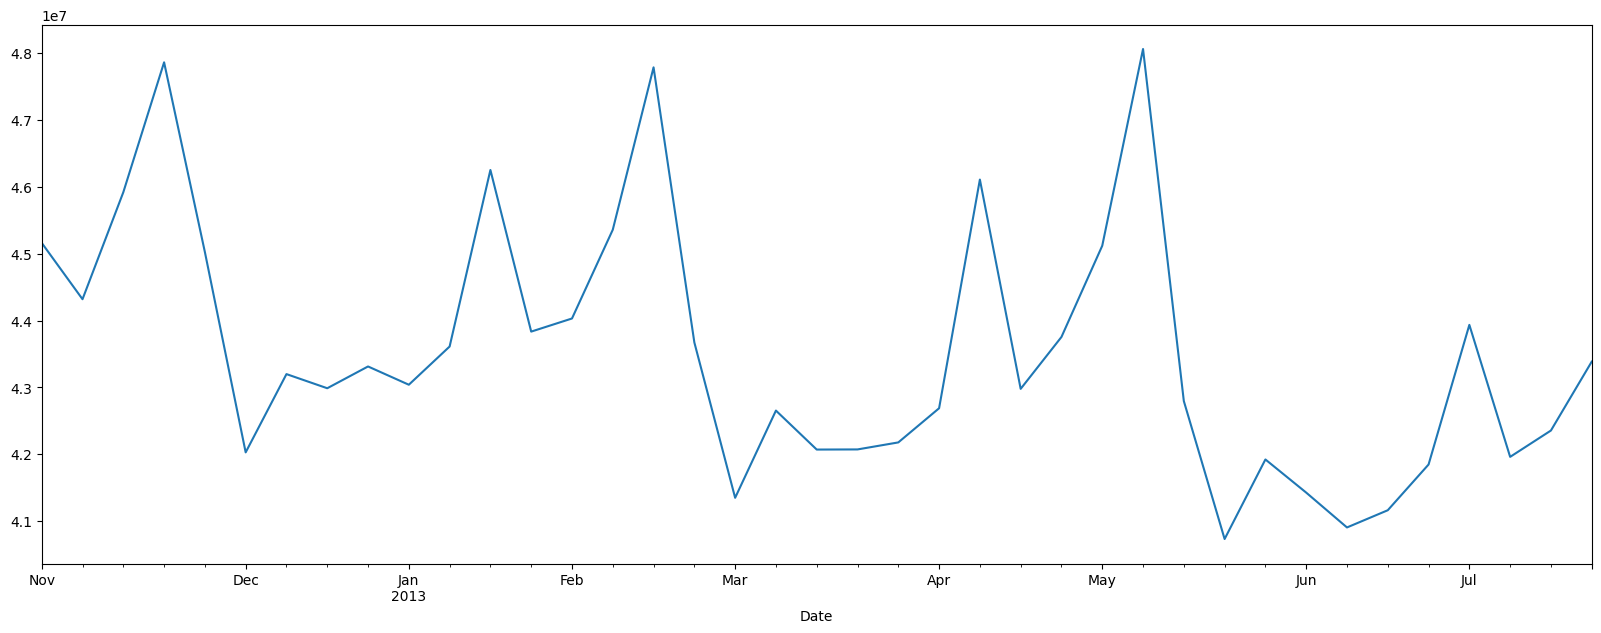

In [ ]:
test_grp['forecast']=sarimax_model.predict(start=143,end=182,dynamic=True)
test_grp['forecast'].plot(figsize=(20,7))

In [ ]:
df = pd.concat([train_grp,test_grp])

In [ ]:
df.tail(45)

,Store,Weekly_Sales,IsHoliday,forecast
Date,,,,
2012-09-21,65781.0,44354547.11,0,NaN
2012-09-28,65866.0,43734899.40,0,NaN
2012-10-05,66296.0,47566639.31,0,NaN
2012-10-12,66453.0,46128514.25,0,NaN
2012-10-19,65630.0,45122410.57,0,NaN
2012-10-26,65888.0,45544116.29,0,NaN
2012-11-02,NaN,NaN,0,4.516162e+07
2012-11-09,NaN,NaN,0,4.431910e+07
2012-11-16,NaN,NaN,0,4.591885e+07


<Axes: xlabel='Date'>

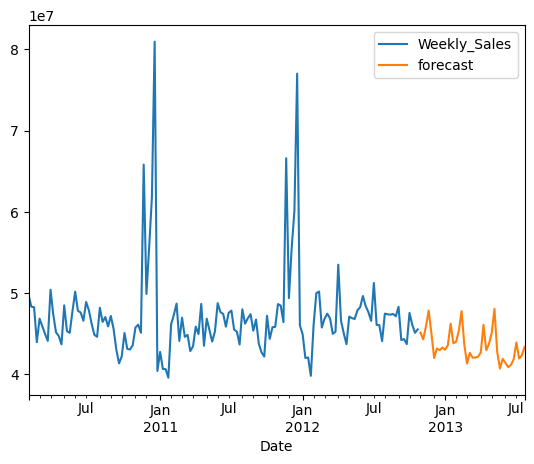

In [ ]:
df[['Weekly_Sales',"forecast"]].plot()

**SARIMAX Model**

In [ ]:
p,d,q,s = 5,1,1,13

In [ ]:
model1 = SARIMAX(train_grp.Weekly_Sales,order=(p,d,q),seasonal_order=(p,d,q,s))
sarimax_model = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

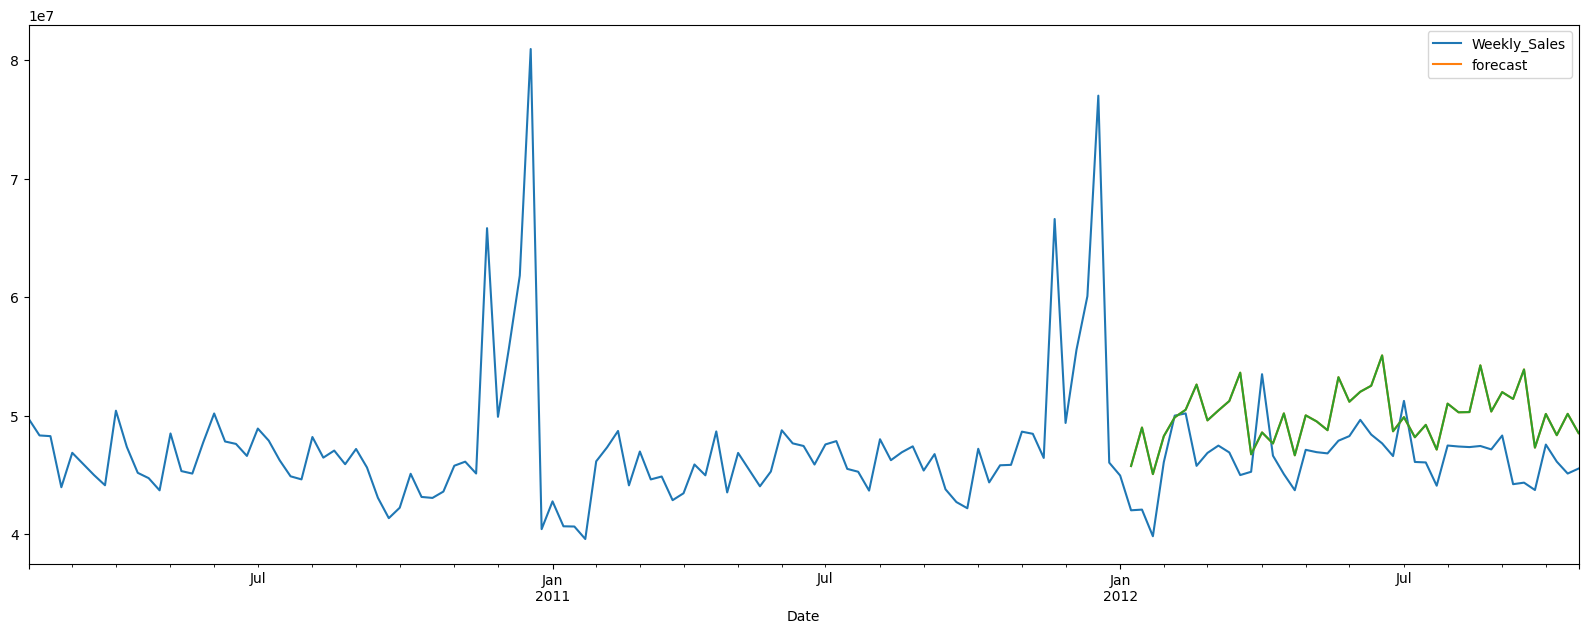

In [ ]:
df4 = train_grp.drop("IsHoliday",axis=1)
df4['forecast']=sarimax_model.predict(start=101,end=180,dynamic=True)
df4[['Weekly_Sales','forecast']].plot(figsize=(20,7))
df4['forecast'].plot()

**Forecasting future 57 steps**

<Axes: xlabel='Date'>

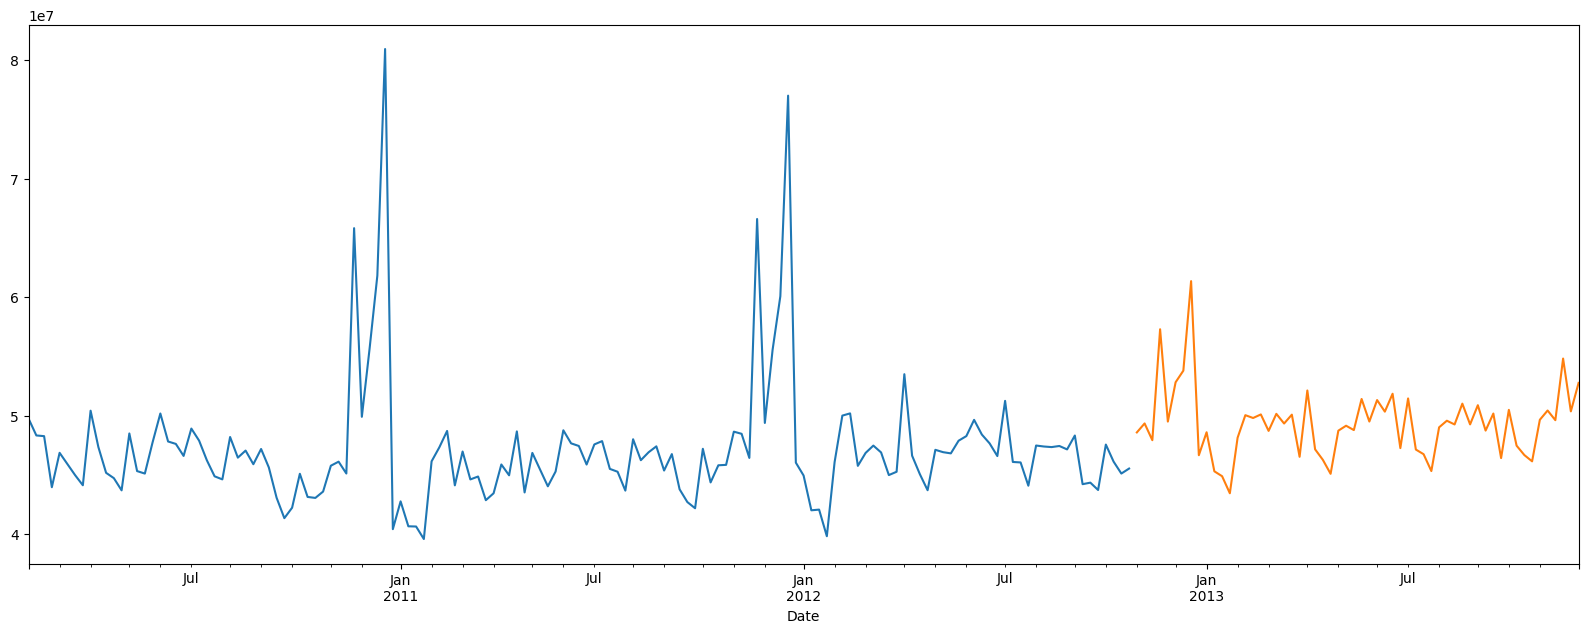

In [ ]:
plt.figure(figsize=(20,7))
forecast=sarimax_model.predict(start=143,end=200,dynamic=True)
train_grp.Weekly_Sales.plot()
forecast.plot()